Código e execução do algoritmo de HillClimbing


=== Simulação 1 ===
Fitness final: 1042
Média do fitness (durante execução): 673.6154
Desvio padrão do fitness (durante execução): 253.2917

=== Simulação 2 ===
Fitness final: 974
Média do fitness (durante execução): 706.5385
Desvio padrão do fitness (durante execução): 238.0261

=== Simulação 3 ===
Fitness final: 1009
Média do fitness (durante execução): 713.9000
Desvio padrão do fitness (durante execução): 203.4421

=== Simulação 4 ===
Fitness final: 1011
Média do fitness (durante execução): 601.3125
Desvio padrão do fitness (durante execução): 315.9238

=== Simulação 5 ===
Fitness final: 1042
Média do fitness (durante execução): 643.0000
Desvio padrão do fitness (durante execução): 298.4133

=== Simulação 6 ===
Fitness final: 1030
Média do fitness (durante execução): 609.7333
Desvio padrão do fitness (durante execução): 301.0888

=== Simulação 7 ===
Fitness final: 1042
Média do fitness (durante execução): 691.3077
Desvio padrão do fitness (durante execução): 242.3841

=== Simulação

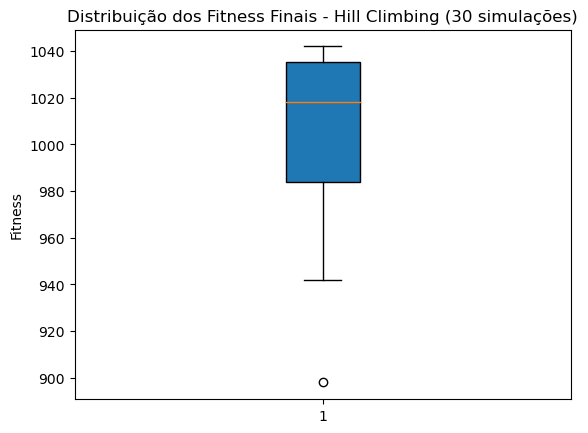

In [2]:
import os
import sys
import copy
import random
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../Codigos"))
from knapsack import knapsack

def gerar_vizinhos_knapsack(solucao, n_vizinhos=10):
    vizinhos = []
    n_itens = len(solucao)
    sorted_pos = []

    for i in range(n_vizinhos):
        pos = random.randint(0, n_itens - 1)
        if pos in sorted_pos:
            continue
        vizinho = solucao.copy()
        vizinho[pos] = 1 - vizinho[pos]  # flip do bit
        vizinhos.append(vizinho)
        sorted_pos.append(pos)

    return vizinhos


class HillClimbing:
    def __init__(self, funcao_fitness, gerar_vizinhos, maximizar=True):
        self.funcao_fitness = funcao_fitness
        self.gerar_vizinhos = gerar_vizinhos
        self.maximizar = maximizar
        self.historico = []

    def executar(self, solucao_inicial, max_iteracoes=1000, verbose=False):
        solucao_atual = copy.deepcopy(solucao_inicial)
        fitness_atual = self.funcao_fitness(solucao_atual)

        self.historico = [fitness_atual]
        iteracao = 0

        while iteracao < max_iteracoes:
            iteracao += 1
            vizinhos = self.gerar_vizinhos(solucao_atual)
            melhor_vizinho = None
            melhor_fitness_vizinho = fitness_atual

            for vizinho in vizinhos:
                fitness_vizinho = self.funcao_fitness(vizinho)
                eh_melhor = (
                    fitness_vizinho > melhor_fitness_vizinho
                    if self.maximizar
                    else fitness_vizinho < melhor_fitness_vizinho
                )
                if eh_melhor:
                    melhor_vizinho = vizinho
                    melhor_fitness_vizinho = fitness_vizinho

            if melhor_vizinho is not None:
                solucao_atual = copy.deepcopy(melhor_vizinho)
                fitness_atual = melhor_fitness_vizinho
            else:
                break

            self.historico.append(fitness_atual)

        return solucao_atual, fitness_atual, self.historico


if __name__ == "__main__":

    DIM = 20
    MAX_ITERACOES = 200
    N_SIMULACOES = 30

    resultados_finais = []

    for i in range(N_SIMULACOES):
        solucao_inicial = [int(random.random() > 0.8) for _ in range(DIM)]
        hill_climbing = HillClimbing(
            funcao_fitness=lambda sol: knapsack(sol, dim=DIM)[0],
            gerar_vizinhos=gerar_vizinhos_knapsack,
            maximizar=True,
        )
        _, melhor_fitness, historico = hill_climbing.executar(
            solucao_inicial, max_iteracoes=MAX_ITERACOES, verbose=False
        )

        # Média e desvio padrão do histórico da simulação
        media_exec = np.mean(historico)
        desvio_exec = np.std(historico)

        resultados_finais.append(melhor_fitness)

        print(f"\n=== Simulação {i+1} ===")
        print(f"Fitness final: {melhor_fitness}")
        print(f"Média do fitness (durante execução): {media_exec:.4f}")
        print(f"Desvio padrão do fitness (durante execução): {desvio_exec:.4f}")

    # Estatísticas globais (fitness finais das 30 execuções)
    media_global = np.mean(resultados_finais)
    desvio_global = np.std(resultados_finais)

    print("\n=== RESULTADOS GLOBAIS ===")
    print(f"Média dos fitness finais: {media_global:.4f}")
    print(f"Desvio padrão dos fitness finais: {desvio_global:.4f}")


    # Boxplot dos fitness finais
    plt.boxplot(resultados_finais, vert=True, patch_artist=True)
    plt.title("Distribuição dos Fitness Finais - Hill Climbing (30 simulações)")
    plt.ylabel("Fitness")
    caminho_arquivo = "../imagens/boxplot_fitness.png"
    plt.savefig(caminho_arquivo, dpi=300, bbox_inches="tight")

    print(f"\nBoxplot salvo em: {caminho_arquivo}")

In [3]:
for resultado in resultados_finais :
    print(resultado)

1042
974
1009
1011
1042
1030
1042
1019
1000
1031
1017
942
1042
1024
957
1037
1031
898
1042
993
1031
975
997
981
973
1019
1042
1000
980
1037
